In [ ]:
print("1. Setting up...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris, load_diabetes
import statsmodels.api as sm

1. Setting up...


In [ ]:
import shap
plt.style.use('seaborn-v0_8-whitegrid')
shap.initjs()

In [ ]:
iris = load_iris()
x_clf = pd.DataFrame(iris.data, columns=iris.feature_names)
y_clf = iris.target
y_clf_binary = (y_clf > 0).astype(int)
feature_names_clf = iris.feature_names
target_names_clf = ['Setosa', 'Non-Setosa']


In [ ]:
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf_binary, test_size=0.2, random_state=42, stratify=y_clf_binary)

In [ ]:
clf_model = LogisticRegression()
clf_model.fit(x_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(x_test_clf)

In [ ]:
cm = confusion_matrix(y_test_clf, y_pred_clf)
print(cm)

[[10  0]
 [ 0 20]]


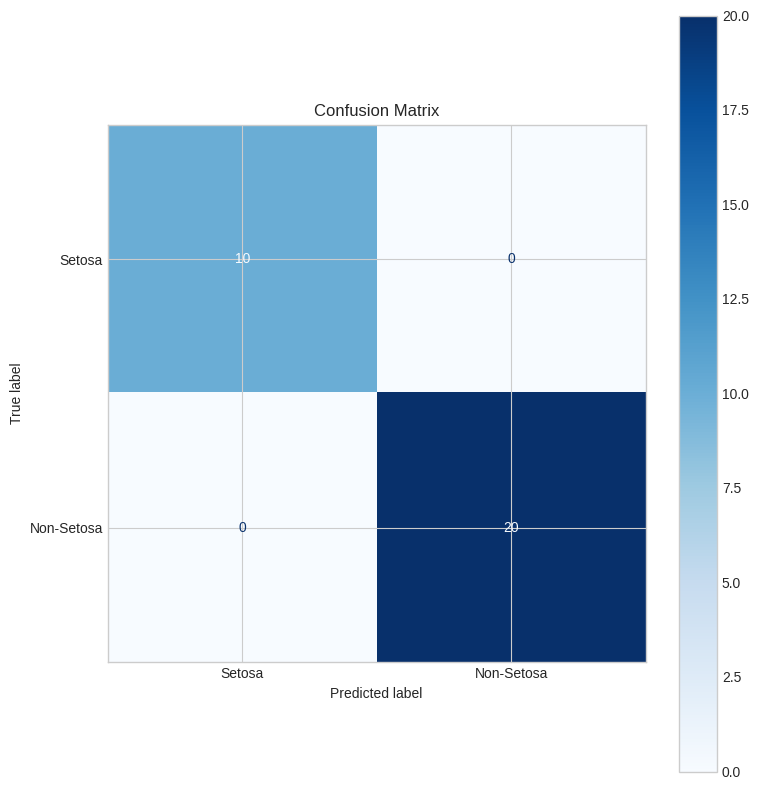

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_clf)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 10
False Positives: 0
False Negatives: 0
True Positives: 20


In [ ]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

In [ ]:
print(f"Accuracy: {accuracy}")
print('Accuracy means overall classification results')
print(f"Precision: {precision}")
print('Precision is (TP/(TP+FP)), of all predictions, how many are actually your prediction')
print(f"Recall: {recall}")
print('Recall is (TP/(TP+FN)), of all actuals, how many are actually your prediction')
print(f"F1 Score: {f1}")
print('F1 Score is the harmonic mean of precision and recall, (precision * recall)/(precision + recall)')

Accuracy: 1.0
Accuracy means overall classification results
Precision: 1.0
Precision is (TP/(TP+FP)), of all predictions, how many are actually your prediction
Recall: 1.0
Recall is (TP/(TP+FN)), of all actuals, how many are actually your prediction
F1 Score: 1.0
F1 Score is the harmonic mean of precision and recall, (precision * recall)/(precision + recall)


<Figure size 800x600 with 0 Axes>

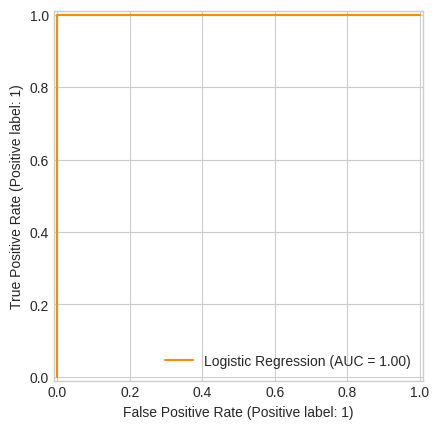

<Figure size 800x600 with 0 Axes>

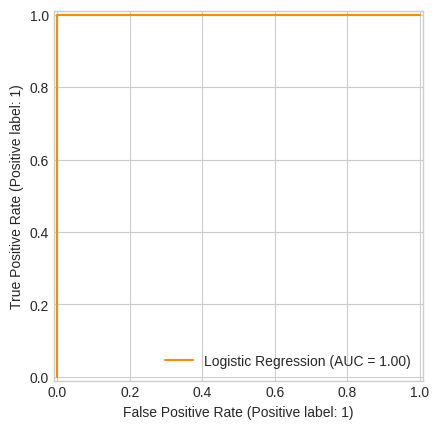

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_pred_proba_clf = clf_model.predict_proba(x_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_clf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test_clf, y_pred_proba_clf, name='Logistic Regression', color='darkorange')
roc_auc = auc(fpr, tpr)
plt.show()

In [ ]:
print(f'AUC Score: {roc_auc}')

AUC Score: 1.0


In [ ]:
diabetes = load_diabetes()
x_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_reg = diabetes.target
feature_names_reg = diabetes.feature_names
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)


In [ ]:
x_bv = x_train_reg[['bmi']]
y_bv = y_train_reg
x_test_bv = x_test_reg[['bmi']]
y_test_bv = y_test_reg

In [ ]:
train_errors, test_errors = [], []
degrees = range(1, 10)

for degree in degrees:
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])
    pipeline.fit(x_bv, y_bv)
    y_train_pred = pipeline.predict(x_bv)
    y_test_pred = pipeline.predict(x_test_bv)
    train_errors.append(mean_squared_error(y_bv, y_train_pred))
    test_errors.append(mean_squared_error(y_test_bv, y_test_pred))


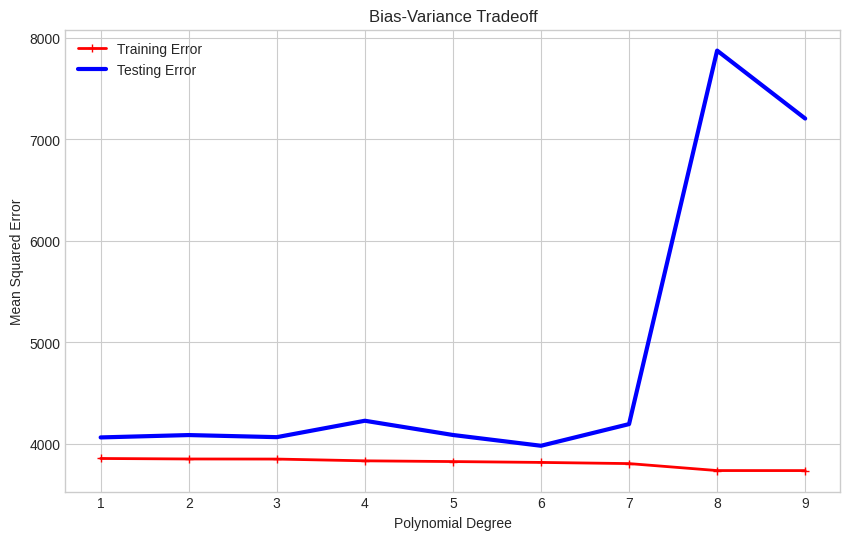

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'r-+', linewidth=2, label='Training Error')
plt.plot(degrees, test_errors, 'b-', linewidth=3, label='Testing Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

In [ ]:
x_train_reg_sm = sm.add_constant(x_train_reg)
x_test_reg_sm = sm.add_constant(x_test_reg)
model = sm.OLS(y_train_reg, x_train_reg_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.41e-50
Time:                        23:27:27   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

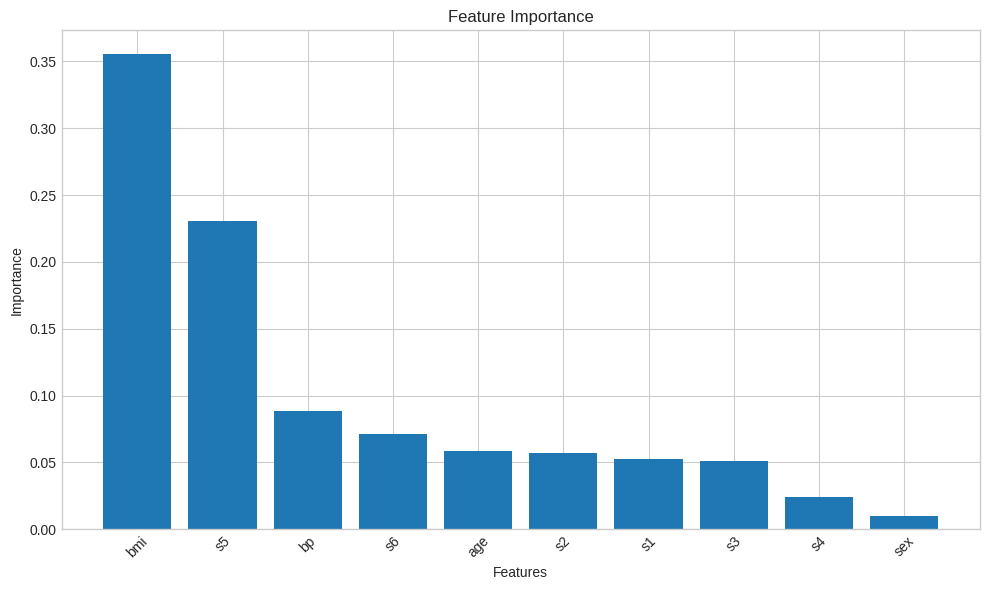

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_reg, y_train_reg)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x_train_reg.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train_reg.shape[1]), [feature_names_reg[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_test_reg)

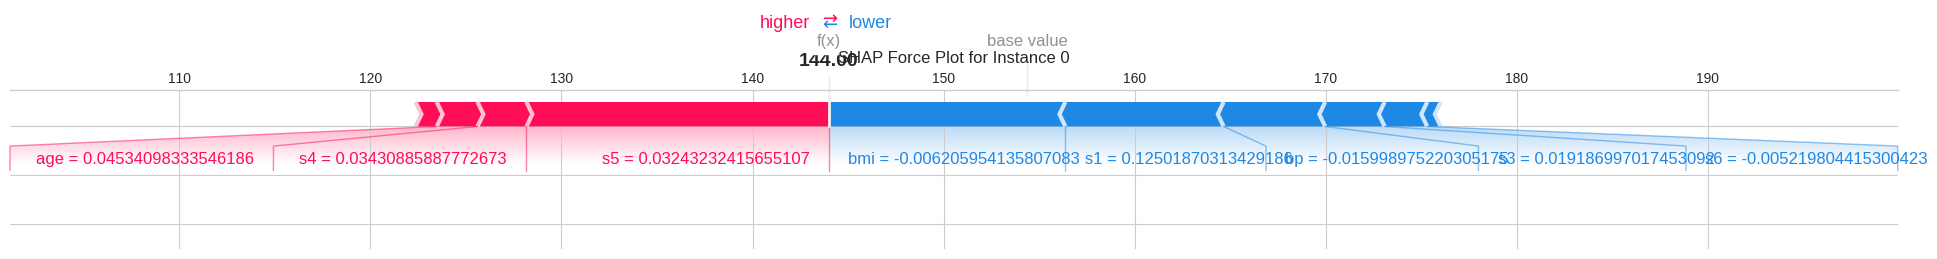

In [ ]:
instance_index = 0
expected_value = explainer.expected_value
if isinstance(expected_value, np.ndarray):
    expected_value = expected_value.mean()

shap.force_plot(expected_value, shap_values[instance_index, :], x_test_reg.iloc[instance_index, :], matplotlib=True, show=False)
plt.title(f'SHAP Force Plot for Instance {instance_index}')
plt.tight_layout()
plt.show()

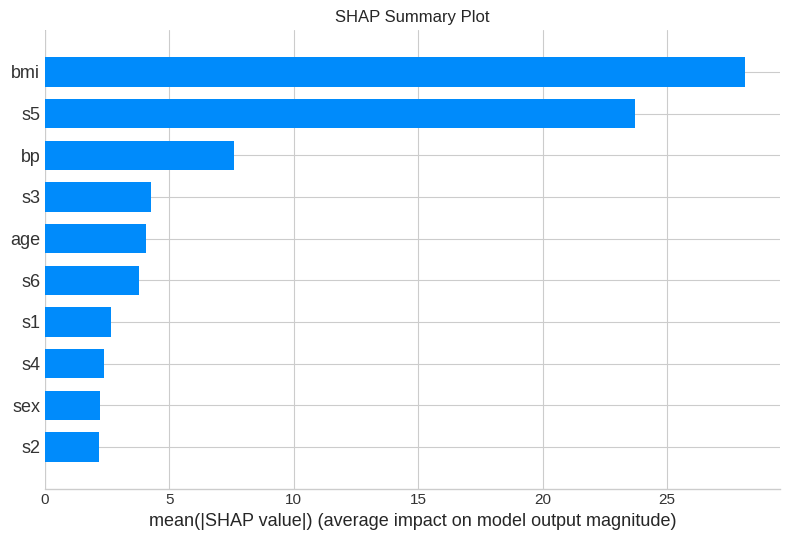

In [ ]:
shap.summary_plot(shap_values, x_test_reg, plot_type='bar', show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

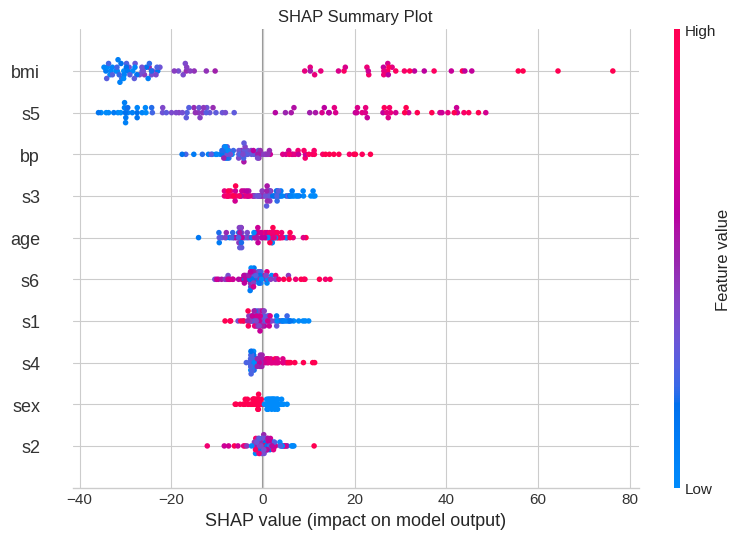

In [ ]:
shap.summary_plot(shap_values, x_test_reg, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()